In [5]:
library(readxl)
library(car)
library(MVN)

# 1

## a

In [6]:
essay<-read_excel("Kuis2_data.xlsx")
essay

New names:
* Words -> Words...1
* Verbs -> Verbs...2
* Words -> Words...3
* Verbs -> Verbs...4



Words...1,Verbs...2,Words...3,Verbs...4
<dbl>,<dbl>,<dbl>,<dbl>
148,20,137,15
159,24,164,25
144,19,224,27
103,18,208,33
121,17,178,24
89,11,128,20
119,17,154,18
123,13,158,16
76,16,102,21


In [7]:
d_words <- essay[, 1] - essay[, 3]
d_verbs <- essay[, 2] - essay[, 4]
d_essay <- cbind(d_words, d_verbs)
as.data.frame(d_essay)

Words...1,Verbs...2
<dbl>,<dbl>
11,5
-5,-1
-80,-8
-105,-15
-57,-7
-39,-9
-35,-1
-35,-3
-26,-5


In [8]:
dbar_essay <- colMeans(d_essay)
dbar_essay

Words...1  Verbs...2 
-32.800000  -3.533333

In [9]:
S_essay <- cov(d_essay)
S_essay

,Words...1,Verbs...2
Words...1,1096.029,139.90000
Verbs...2,139.900,31.55238


In [32]:
n_essay <- nrow(d_essay)
n_essay

[1] 15

In [30]:
T2 <- n_essay*t(dbar_essay) %*% solve(S_essay) %*% (dbar_essay)
T2

15.19123


In [31]:
p_essay <- 2

alpha_essay = 1 - 0.05

crit_val_essay <- (((n_essay - 1) * p_essay)/((n_essay - p_essay) * n_essay)) * qf(p = alpha_essay, df1 = p_essay, df2 = n_essay - p_essay)

crit_val_essay

[1] 0.5464401

## b.

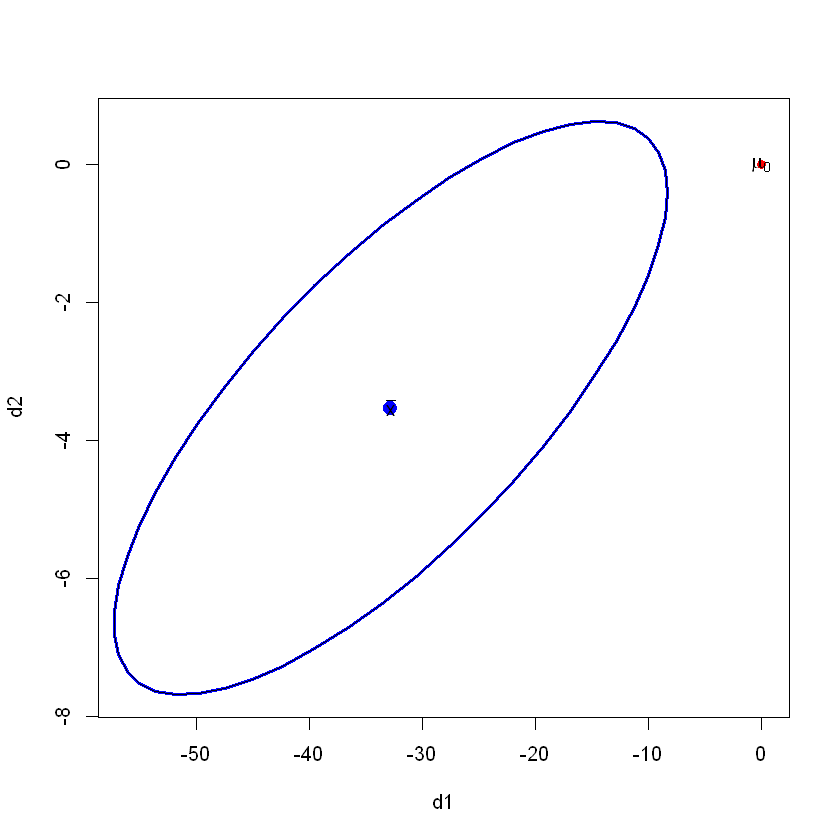

In [18]:
mu <- c(0,0)
X <- d_essay
n <- nrow(X)
p <- ncol(X)
xbar <- colMeans(X)
S <- cov(X)
alpha<-0.05
tconst <- sqrt((p/n)*((n-1)/(n-p)) *
                 qf(1-alpha,p,n-p))
id <- c(1,2)

plot(ellipse(center=xbar[id], shape=S[id,id],
             radius=tconst, draw=F),type="n", xlab = "d1", ylab = "d2", xlim = c(-56.4,0.25))
lines(ellipse(center=xbar[id], shape=S[id,id],
              radius=tconst, lwd=3))
points(mu[1],mu[2],col="red", pch=16)
text(mu[1]+0.05,mu[2],expression(mu[0]))
text(xbar[1]+0.05,xbar[2],expression(bar(x)))

## c

In [13]:
bon <- NULL 
alpha3 <- 1 - (0.05/(2*p))

for(k in 1:2){
  bon <- c(bon, dbar[k] - sqrt(Sd[k,k]/n) * qt(alpha3, df=n-1), dbar[k] + sqrt(Sd[k,k]/n) * qt(alpha3, df=n-1))
}

rtab <- rbind(bon)
rtab

,Words...1,Words...1,Verbs...2,Verbs...2
bon,-54.25184,-11.34816,-7.173067,0.1064007


# 2

## a.

## b

In [14]:
baca_C <- c(90, 85, 80, 70, 85, 78, 65, 80, 72)
baca_T <- c(15, 98, 107, 100, 105, 95, 89, 100, 90)
hitung_C <- c(92, 95, 81, 80, 68, 82, 62, 70, 73)
hitung_T <- c(108, 105, 98, 105, 95, 98, 78, 85, 95)
iq_C <- c(108, 115, 95, 100, 99, 105, 101, 95, 102)
iq_T <- c(110, 102, 100, 115, 98, 100, 99, 102, 100)

grup_C <- cbind(baca_C, hitung_C, iq_C)
grup_T <- cbind(baca_T, hitung_T, iq_T)

In [15]:
xbar_grupC <- colMeans(grup_C)
xbar_grupC
xbar_grupT <- colMeans(grup_T)
xbar_grupT

baca_C  hitung_C      iq_C 
 78.33333  78.11111 102.22222

baca_T  hitung_T      iq_T 
 88.77778  96.33333 102.88889

In [16]:
S_grupC <- cov(grup_C)
S_grupT <- cov(grup_T)

In [17]:
n_grupC <- nrow(grup_C)
n_grupT <- nrow(grup_T)

Spooled_grup <- (1/(n_grupC + n_grupT - 2)) * (((n_grupC - 1) * S_grupC) + ((n_grupT - 1) * S_grupT))
Spooled_grup

,baca_C,hitung_C,iq_C
baca_C,433.34722,-23.04167,-26.18056
hitung_C,-23.04167,107.43056,41.00694
iq_C,-26.18056,41.00694,36.77778


In [33]:
n_grupT

[1] 9

In [19]:
n_grupC <- nrow(grup_C)
n_grupT <- nrow(grup_T)

Spooled_grup <- (1/(n_grupC + n_grupT - 2)) * (((n_grupC - 1) * S_grupC) + ((n_grupT - 1) * S_grupT))
Spooled_grup

,baca_C,hitung_C,iq_C
baca_C,433.34722,-23.04167,-26.18056
hitung_C,-23.04167,107.43056,41.00694
iq_C,-26.18056,41.00694,36.77778


In [20]:
T2_grup <- t(xbar_grupC - xbar_grupT) %*% solve(((1/n_grupC) + (1/n_grupT)) * Spooled_grup) %*% (xbar_grupC - xbar_grupT)
T2_grup

23.24873


In [21]:
p_grup <- 3
alpha_grup <- 1 - 0.05

crit_val_grup <- (((n_grupC + n_grupT - 2) * p_grup)/(n_grupC + n_grupT - p_grup - 1)) * qf(p = alpha_grup, df1 = p_grup, df2 = n_grupC + n_grupT - p_grup - 1)

crit_val_grup

[1] 11.46476

## c.

In [22]:
bon_grup <- NULL
alpha_bon <- 1 - (0.05/(2 * p_grup))

for (k in c(1:3)) {
  bon_grup <- c(bon_grup, (xbar_grupC[k] - xbar_grupT[k]) - qt(p = alpha_bon, df = n_grupC + n_grupT - 2) * sqrt(((1/n_grupC) + (1/n_grupT)) * Spooled_grup[k,k]), (xbar_grupC[k] - xbar_grupT[k]) + qt(p = alpha_bon, df = n_grupC + n_grupT - 2) * sqrt(((1/n_grupC) + (1/n_grupT)) * Spooled_grup[k,k]))
}

rtab <- rbind(bon_grup)
round(rtab, 3)

,baca_C,baca_C,hitung_C,hitung_C,iq_C,iq_C
bon_grup,-36.676,15.787,-31.283,-5.162,-8.308,6.975


## d.

In [23]:
set.seed(1000)
mvn(grup_C, mvnTest = "royston")

$multivariateNormality
     Test        H  p value MVN
1 Royston 0.548199 0.918497 YES

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling  baca_C      0.2199    0.7629    YES   
2 Anderson-Darling hitung_C     0.2112    0.7933    YES   
3 Anderson-Darling   iq_C       0.2974    0.5138    YES   

$Descriptives
         n      Mean   Std.Dev Median Min Max 25th 75th       Skew   Kurtosis
baca_C   9  78.33333  8.046738     80  65  90   72   85 -0.2160977 -1.3958719
hitung_C 9  78.11111 10.948110     80  62  95   70   82  0.1442268 -1.4399176
iq_C     9 102.22222  6.379220    101  95 115   99  105  0.6423862 -0.7585445

In [24]:
mvn(grup_T, mvnTest = "royston")

$multivariateNormality
     Test        H      p value MVN
1 Royston 20.13103 0.0001514273  NO

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling  baca_T      1.6099    0.0001    NO    
2 Anderson-Darling hitung_T     0.3710    0.3393    YES   
3 Anderson-Darling   iq_T       1.0201    0.0058    NO    

$Descriptives
         n      Mean   Std.Dev Median Min Max 25th 75th      Skew   Kurtosis
baca_T   9  88.77778 28.318624     98  15 107   90  100 -1.895452  2.1568394
hitung_T 9  96.33333  9.746794     98  78 108   95  105 -0.566788 -1.0387812
iq_T     9 102.88889  5.732461    100  98 115  100  102  1.112817 -0.4191918